# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previous numerical exercise.

## Resolution

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib as mpl
import mpmath
import seaborn as sns
from scipy.integrate import solve_ivp

from IPython import display
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

from typing import List
from collections import Counter

For this part of the TSP, Simulated Annealing has chosen. The parametre $\beta$ has been increased from $0$ to $50$ with a step of $0.001$. In every step, at constant $\beta$, $256$ metropolis step has been done. For a Metropolis step I used the same methods of the LSN_09 : PairPermutation, Shift, Permutation and Inversion. Then I plotted the length of path, in function of the number of iteration (I plotted only one point every 256 iteration).

### $i)$ Circle

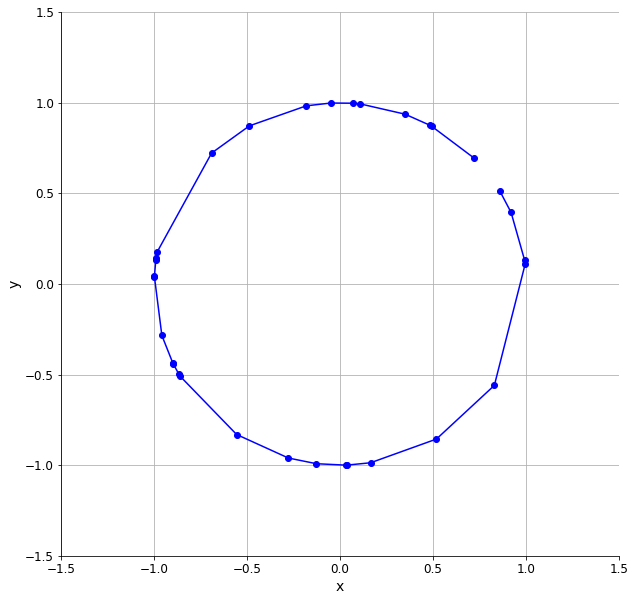

In [43]:
file = open("citycircle.out")
rude = file.read()
data=rude.split(' ')
N = int((len(data)-1) / 2)
data_x = np.zeros(N)
data_y = np.zeros(N)

for i in range(N):
    data_x[i] = float(data[2*i])
    data_y[i] = float(data[2*i+1])

plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(data_x, data_y, color="blue", marker="o")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
#plt.show()

file.close()

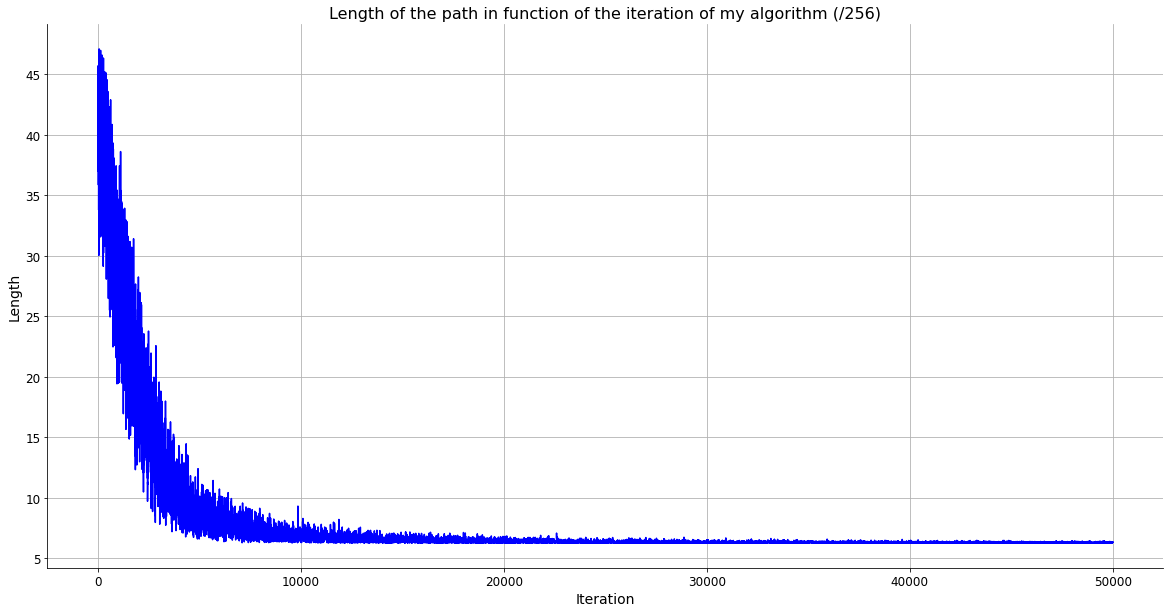

In [47]:
file = open("Length0.out")
rude = file.read()
data=rude.split(' ')
N = int(len(data)-1)
data_x = np.zeros(N)

for i in range(N):
    data_x[i] = float(data[i])

plt.figure(figsize=(20,10))
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Length of the path in function of the iteration of my algorithm (/256)')
plt.grid(True)
plt.plot(data_x, color="blue")
#plt.show()
file.close()

### $ii)$ Square

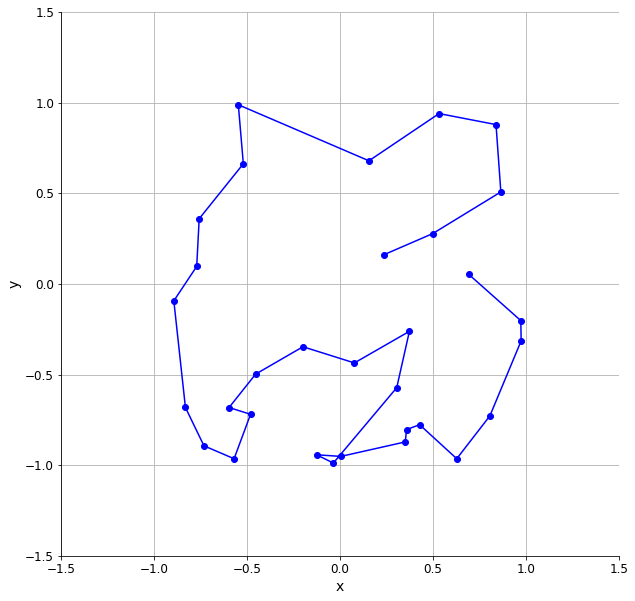

In [45]:
file = open("citysquare.out")
rude = file.read()
data=rude.split(' ')
N = int((len(data)-1) / 2)
data_x = np.zeros(N)
data_y = np.zeros(N)

for i in range(N):
    data_x[i] = float(data[2*i])
    data_y[i] = float(data[2*i+1])

plt.figure(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(data_x, data_y, color="blue", marker="o")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

file.close()

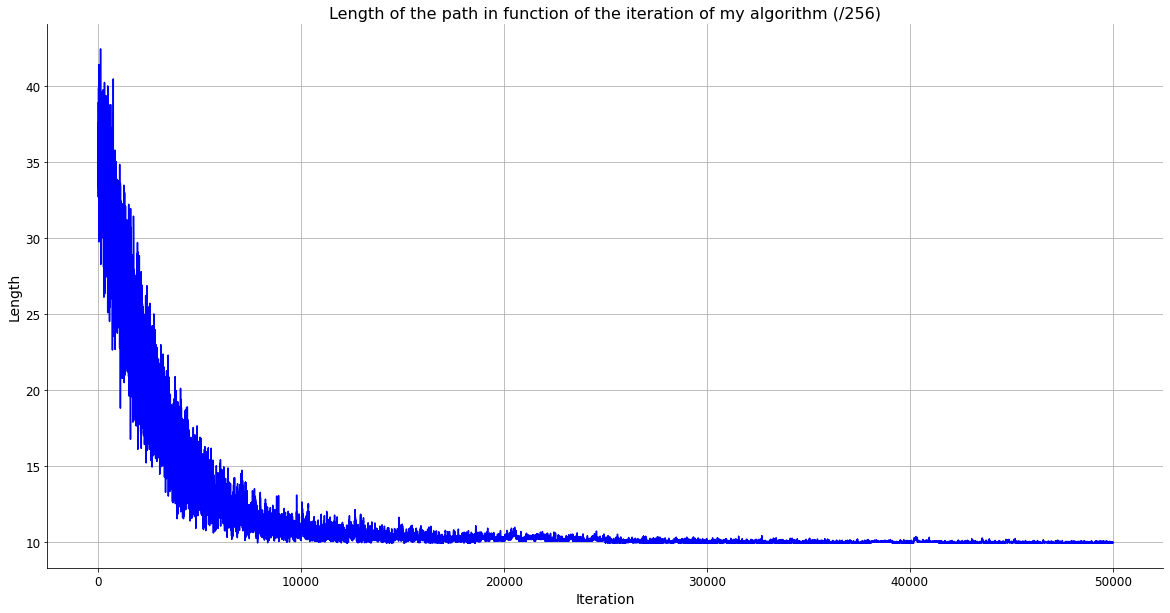

In [48]:
file = open("Length1.out")
rude = file.read()
data=rude.split(' ')
N = int(len(data)-1)
data_x = np.zeros(N)

for i in range(N):
    data_x[i] = float(data[i])

plt.figure(figsize=(20,10))
plt.xlabel('Iteration')
plt.ylabel('Length')
plt.title('Length of the path in function of the iteration of my algorithm (/256)')
plt.grid(True)
plt.plot(data_x, color="blue")
#plt.show()
file.close()

## Comments

This algorithm is far more speeder than the previous that I implemented for LSN_09, the results seem to be reasonably right.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

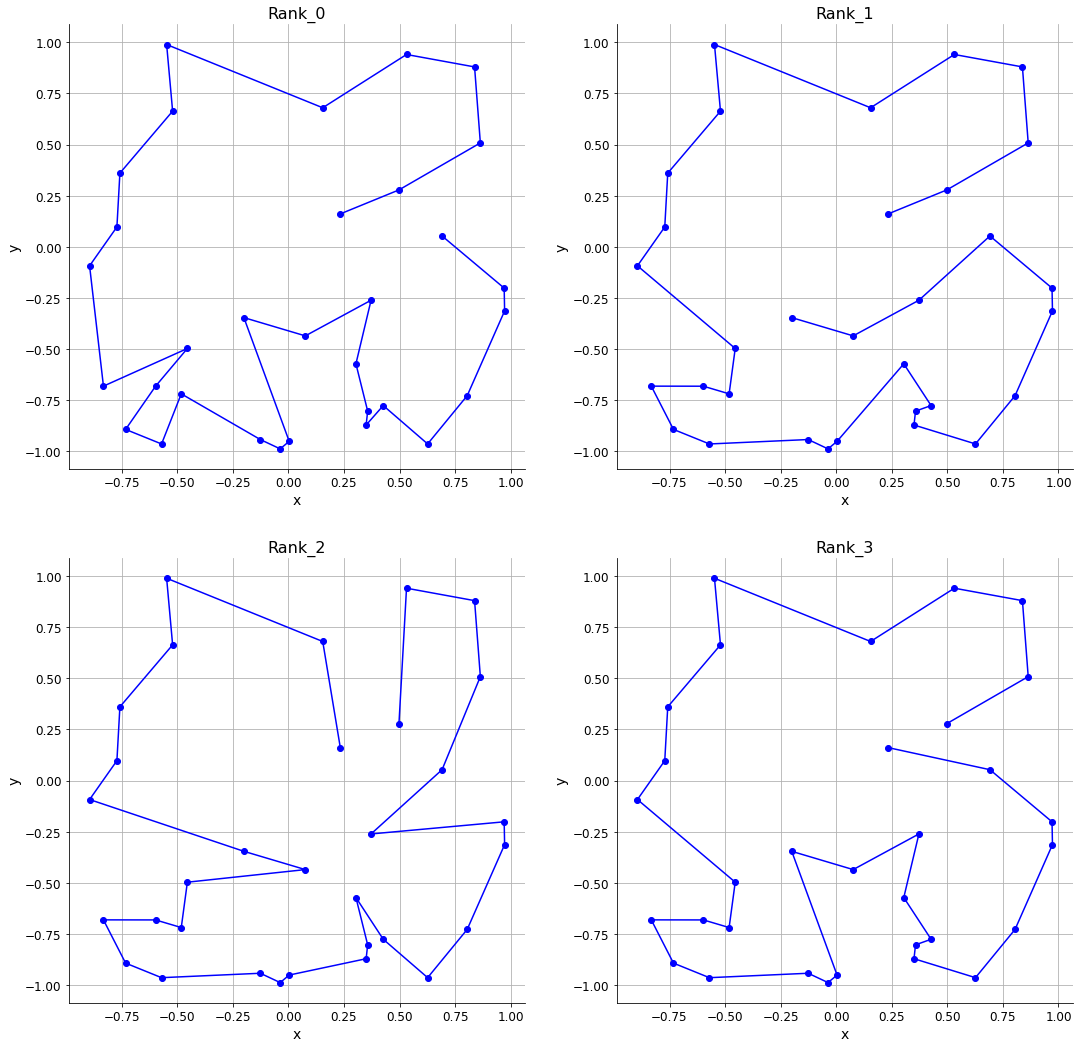

In [63]:
x = []
y = []
for j in range(4):
    file = open("es2/citysquare"+str(j)+".out")
    rude = file.read()
    data=rude.split(' ')
    N = int((len(data)-1) / 2)
    data_x = np.zeros(N)
    data_y = np.zeros(N)
    for i in range(N):
        data_x[i] = float(data[2*i])
        data_y[i] = float(data[2*i+1])
    x.append(data_x)
    y.append(data_y)
    file.close()
    
fig, axx = plt.subplots(2, 2, figsize=(18, 18))
axx = axx.reshape(-1)
for s in range(4):
    ax = axx[s]
    ax.plot(x[s], y[s], color="blue", marker="o" )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("Rank_"+str(s))
    ax.grid()

The four found path are very similar, but with some differences.

In [64]:
x = []
y = []
for j in range(4):
    file = open("es2/Length"+str(j)+".out")
    rude = file.read()
    data=rude.split(' ')
    N = int((len(data)-1) / 2)
    file.close()
    data_x = np.zeros(N)
    data_y = np.zeros(N)
    for i in range(N):
        data_x[i] = float(data[2 * i])
        data_y[i] = float(data[2 * i + 1])
    x.append(data_x) #first half
    y.append(data_y) #best one
tot = [x,y]
title = ["best one", "first half"]

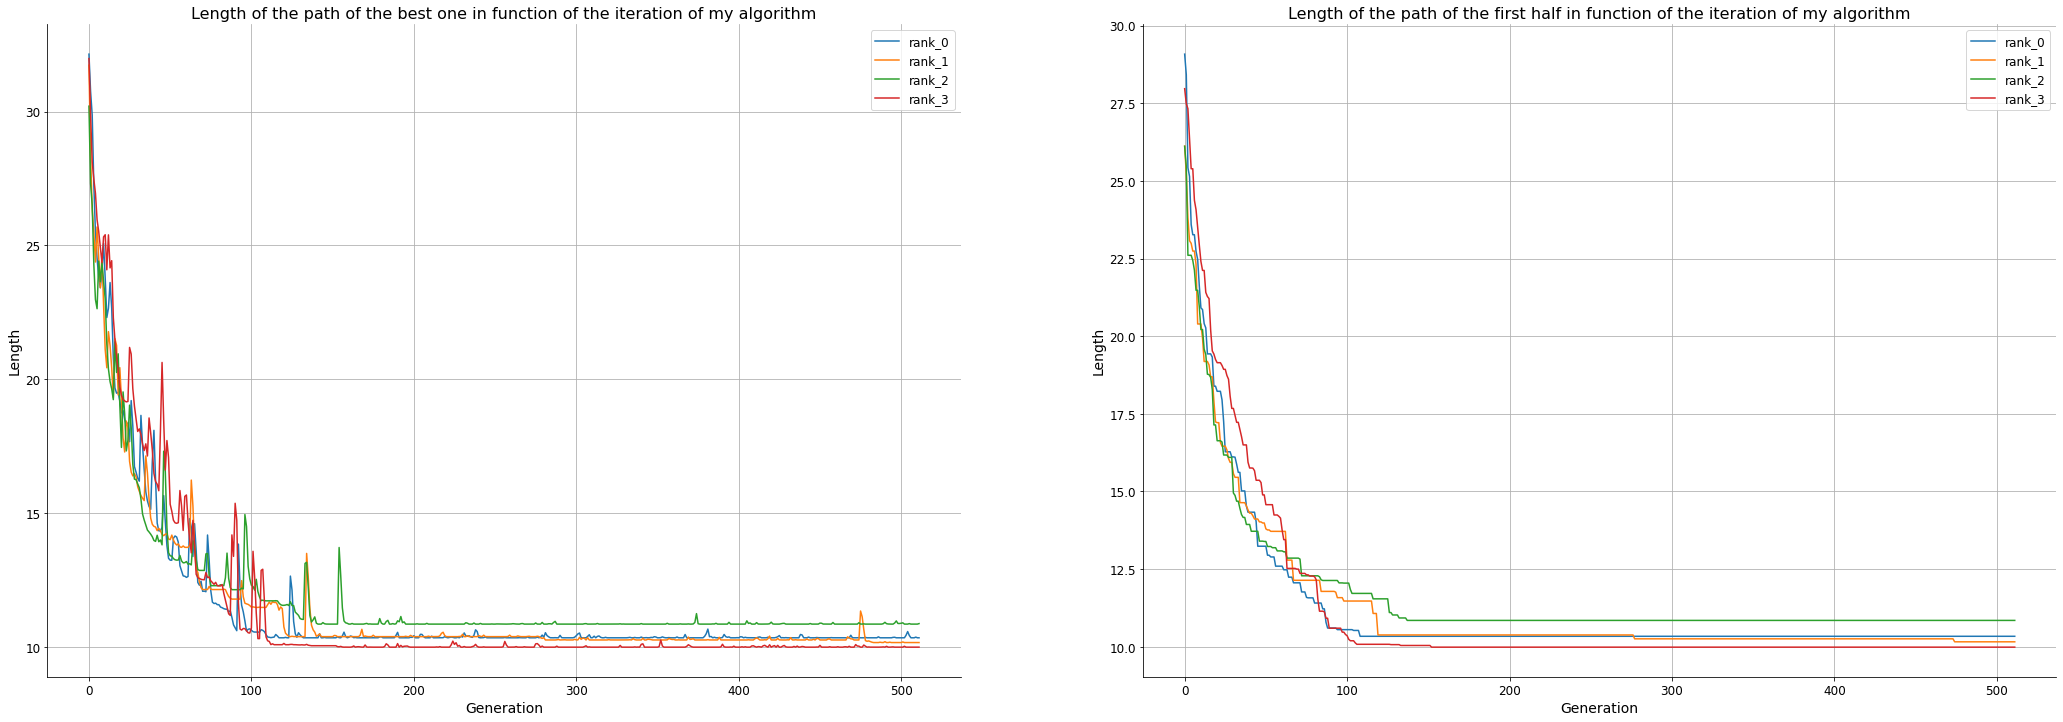

In [65]:
fig, axx = plt.subplots(1, 2, figsize=(36, 12))
axx = axx.reshape(-1)
for l in range(2):
    ax = axx[l]
    for s in range(4):
        ax.plot(tot[l][s], label='rank_'+str(s))
    ax.set_xlabel('Generation')
    ax.set_ylabel('Length')
    ax.set_title("Length of the path of the " + title[l]+" in function of the iteration of my algorithm")
    ax.grid()
    ax.legend()


For this simulations I made 512 generations on a population of 256 members.

Every 16 generations, 3 migrants (the best of each population) are sent from one continent to the following. We can notice spikes and steep descent, probably due to the migration of the bist member of the population.

The migration of the best members force the system to slow down in correspondence of MPI_Isend and MPI_Recv.

Anyway the parallelized algorithm works much better, in fact allows to find the shortest path for the TSP problem in much less time (after about 100-150 generations, instead of 200).